In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle
from scipy import signal

In [2]:
#make lists of isotopes and half-lives

u238n =15
u238ppm = 9e-15
U238thalf = np.zeros((u238n,))
U238thalf[0]= 4.468e9*365*24*60*60 #seconds
U238thalf[1]= 24.10*24*60*60
U238thalf[2]= 1.159*60
U238thalf[3]= 2.455e5*365*24*60*60
U238thalf[4]= 7.54e4*365*24*60*60
U238thalf[5]= 1600*365*24*60*60
U238thalf[6]= 3.8235*24*60*60
U238thalf[7]= 3.098*60
U238thalf[8]= 27.06*60
U238thalf[9]= 19.9*60
U238thalf[10]= 19.9*60*0.02 #branching ratio of 2%
U238thalf[11]= 163.6e-6
U238thalf[12]= 22.20*365*24*60*60
U238thalf[13]= 5.012*24*60*60
U238thalf[14]= 138.376*24*60*60
print(U238thalf)
U238tmean = U238thalf/np.log(2)
u238R = (1/U238tmean[0])*u238ppm
print(U238tmean)
U238N = u238R*U238tmean
print(U238N)
U238chain = np.asarray(U238thalf,dtype=np.dtype('U25'))
U238chain[0] = '922380'
U238chain[1] = '902340'
U238chain[2] = '912340'
U238chain[3] = '922340'
U238chain[4] = '902300'
U238chain[5] = '882260'
U238chain[6] = '862220'
U238chain[7] = '842180'
U238chain[8] = '822140'
U238chain[9] = '832140'
U238chain[10] = '832140'
U238chain[11] = '842140'
U238chain[12] = '822100'
U238chain[13] = '832100'
U238chain[14] = '842100'
print(U238chain)
U238decay = np.asarray(U238thalf,dtype=np.dtype('U25'))
U238decay[0] = 'alpha'
U238decay[1] = 'beta'
U238decay[2] = 'beta'
U238decay[3] = 'alpha'
U238decay[4] = 'alpha'
U238decay[5] = 'alpha'
U238decay[6] = 'alpha'
U238decay[7] = 'alpha'
U238decay[8] = 'beta'
U238decay[9] = 'beta'
U238decay[10] = 'alpha'
U238decay[11] = 'alpha'
U238decay[12] = 'beta'
U238decay[13] = 'beta'
U238decay[14] = 'alpha'
print(U238decay)

#do some sorting
p = U238chain.argsort()
print(p)
U238chain = U238chain[p]
U238decay = U238decay[p]
U238N = U238N[p]
U238tmean = U238tmean[p]
U238thalf = U238thalf[p]

[1.40902848e+17 2.08224000e+06 6.95400000e+01 7.74208800e+12
 2.37781440e+12 5.04576000e+10 3.30350400e+05 1.85880000e+02
 1.62360000e+03 1.19400000e+03 2.38800000e+01 1.63600000e-04
 7.00099200e+08 4.33036800e+05 1.19556864e+07]
[2.03279840e+17 3.00403732e+06 1.00325013e+02 1.11694720e+13
 3.43046104e+12 7.27949293e+10 4.76594884e+05 2.68168154e+02
 2.34235967e+03 1.72257788e+03 3.44515576e+01 2.36024909e-04
 1.01002964e+09 6.24740044e+05 1.72484095e+07]
[9.00000000e-15 1.33000576e-25 4.44178389e-30 4.94516562e-19
 1.51880036e-19 3.22291853e-21 2.11007346e-26 1.18728615e-29
 1.03705498e-28 7.62653144e-29 1.52530629e-30 1.04497533e-35
 4.47179946e-23 2.76597049e-26 7.63655094e-25]
['922380' '902340' '912340' '922340' '902300' '882260' '862220' '842180'
 '822140' '832140' '832140' '842140' '822100' '832100' '842100']
['alpha' 'beta' 'beta' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'beta'
 'beta' 'alpha' 'alpha' 'beta' 'beta' 'alpha']
[12  8 13  9 10 14 11  7  6  5  4  1  2  3  0]


In [3]:
for i,el in enumerate(U238chain):
    if(U238decay[i]=='alpha'):
      print('{} {}'.format(el,U238N[i]))

832140 1.5253062876344416e-30
842100 7.636550937565153e-25
842140 1.0449753293843996e-35
842180 1.1872861505255025e-29
862220 2.1100734599771893e-26
882260 3.2229185317815576e-21
902300 1.518800358102059e-19
922340 4.945165622202327e-19
922380 9e-15


In [4]:
u238sourcesFL = pd.read_csv("copper-inputs/interface/U238-chain-copper-tape6.txt", skiprows=32, nrows=1, engine='python', names=['target','ta','tanum','alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], \
                         delim_whitespace=True)
print (u238sourcesFL.head(10))

u238sources = pd.read_csv("copper-inputs/interface/U238-chain-copper-tape6.txt", skiprows=33, skipfooter=3, engine='python', names=['alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], \
                         delim_whitespace=True)
print (u238sources.head(10))

  target  ta  tanum  alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  \
0     be   9    1.0          0.004     1.154300e-13              0.0   

   neut/sec/cm^2  
0            0.0  
   alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  neut/sec/cm^2
0          0.011     5.442200e-14              0.0            0.0
1          0.017     4.177000e-14              0.0            0.0
2          0.024     3.519900e-14              0.0            0.0
3          0.030     3.098400e-14              0.0            0.0
4          0.037     2.798300e-14              0.0            0.0
5          0.043     2.570700e-14              0.0            0.0
6          0.050     2.390600e-14              0.0            0.0
7          0.056     2.243400e-14              0.0            0.0
8          0.063     2.120400e-14              0.0            0.0
9          0.069     2.015600e-14              0.0            0.0


In [5]:
U238Eafirst = np.asarray(u238sourcesFL['alpha E [MeV]'],dtype=float)
U238Rafirst = np.asarray(u238sourcesFL['alphas/sec/cm^2'],dtype=float)

U238Ea = np.asarray(u238sources['alpha E [MeV]'],dtype=float)
U238Ra = np.asarray(u238sources['alphas/sec/cm^2'],dtype=float)

print(np.shape(U238Eafirst))
print(np.shape(U238Ea))

U238Ea = np.concatenate((U238Eafirst,U238Ea))
U238Ra = np.concatenate((U238Rafirst,U238Ra))
print(np.shape(U238Ea))

(1,)
(999,)
(1000,)


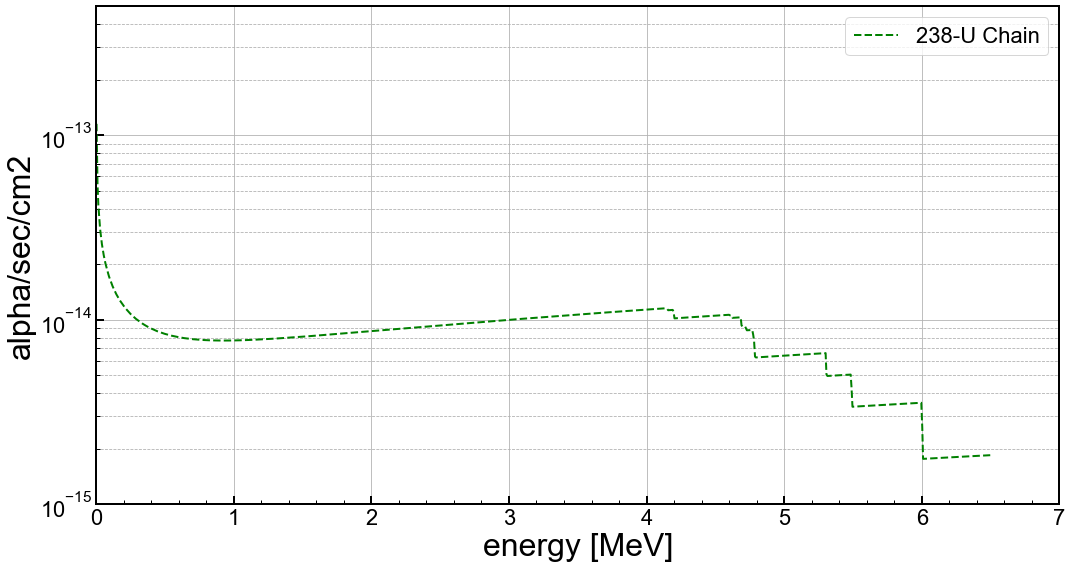

In [6]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

#Eplot=np.linspace(0,5000,1000)
#print(U238Ea)

ax1.plot(U238Ea, U238Ra,color='g',linestyle='--',label="238-U Chain")
#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-15
ymax = 5e-13


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 7) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('alpha/sec/cm2')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [7]:
#make lists of isotopes and half-lives

th232n =12
th232ppm = 3e-14
Th232thalf = np.zeros((th232n,))
Th232thalf[0]= 1.4e10*365*24*60*60 #seconds
Th232thalf[1]= 5.75*365*24*60*60
Th232thalf[2]= 6.15*60*60
Th232thalf[3]= 1.9125*365*24*60*60
Th232thalf[4]= 3.6319*24*60*60
Th232thalf[5]= 55.6
Th232thalf[6]= 0.145
Th232thalf[7]= 10.64*60*60
Th232thalf[8]= 60.55*60*0.3594 #branching
Th232thalf[9]= 60.55*60*0.6406 #branching
Th232thalf[10]= 0.299e-6
Th232thalf[11]= 3.053*60
print(Th232thalf)
Th232tmean = Th232thalf/np.log(2)
th232R = (1/Th232tmean[0])*th232ppm
print(Th232tmean)
Th232N = th232R*Th232tmean
print(Th232N)
Th232chain = np.asarray(Th232thalf,dtype=np.dtype('U25'))
Th232chain[0] = '902320'
Th232chain[1] = '882280'
Th232chain[2] = '892280'
Th232chain[3] = '902280'
Th232chain[4] = '882240'
Th232chain[5] = '862200'
Th232chain[6] = '842160'
Th232chain[7] = '822120'
Th232chain[8] = '832120'
Th232chain[9] = '832120'
Th232chain[10] = '842120'
Th232chain[11] = '812080'


print(Th232chain)
Th232decay = np.asarray(Th232thalf,dtype=np.dtype('U25'))
Th232decay[0] = 'alpha'
Th232decay[1] = 'beta'
Th232decay[2] = 'beta'
Th232decay[3] = 'alpha'
Th232decay[4] = 'alpha'
Th232decay[5] = 'alpha'
Th232decay[6] = 'alpha'
Th232decay[7] = 'beta'
Th232decay[8] = 'alpha'
Th232decay[9] = 'beta'
Th232decay[10] = 'alpha'
Th232decay[11] = 'beta'

print(Th232decay)

#do some sorting
pt = Th232chain.argsort()
print(pt)
Th232chain = Th232chain[pt]
Th232decay = Th232decay[pt]
Th232N = Th232N[pt]
Th232tmean = Th232tmean[pt]
Th232thalf = Th232thalf[pt]


[4.4150400e+17 1.8133200e+08 2.2140000e+04 6.0312600e+07 3.1379616e+05
 5.5600000e+01 1.4500000e-01 3.8304000e+04 1.3057002e+03 2.3272998e+03
 2.9900000e-07 1.8318000e+02]
[6.36955631e+17 2.61606777e+08 3.19412682e+04 8.70126889e+07
 4.52712164e+05 8.02138443e+01 2.09190781e-01 5.52609908e+04
 1.88372720e+03 3.35758388e+03 4.31365817e-07 2.64272878e+02]
[3.00000000e-14 1.23214286e-23 1.50440313e-27 4.09821429e-24
 2.13223092e-26 3.77799522e-30 9.85268537e-33 2.60273973e-27
 8.87217466e-29 1.58138984e-28 2.03169167e-38 1.24469993e-29]
['902320' '882280' '892280' '902280' '882240' '862200' '842160' '822120'
 '832120' '832120' '842120' '812080']
['alpha' 'beta' 'beta' 'alpha' 'alpha' 'alpha' 'alpha' 'beta' 'alpha'
 'beta' 'alpha' 'beta']
[11  7  8  9 10  6  5  4  1  2  3  0]


In [8]:
for i,el in enumerate(Th232chain):
    if(Th232decay[i]=='alpha'):
      print('{} {}'.format(el,Th232N[i]))

832120 8.872174657534247e-29
842120 2.031691672102631e-38
842160 9.852685366383997e-33
862200 3.777995216351381e-30
882240 2.1322309197651662e-26
902280 4.0982142857142855e-24
902320 3e-14


In [9]:
th232sourcesFL = pd.read_csv("copper-inputs/interface/Th232-chain-copper-tape6.txt", skiprows=26, nrows=1, engine='python', \
                names=['target','ta','tanum','alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'],delim_whitespace=True)
print (th232sourcesFL.head(10))

th232sources = pd.read_csv("copper-inputs/interface/Th232-chain-copper-tape6.txt", skiprows=27, skipfooter=3, engine='python', \
                names=['alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], delim_whitespace=True)
print (th232sources.head(10))

  target  ta  tanum  alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  \
0     be   9    1.0          0.004     9.360200e-14              0.0   

   neut/sec/cm^2  
0            0.0  
   alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  neut/sec/cm^2
0          0.011     4.413200e-14              0.0            0.0
1          0.017     3.387300e-14              0.0            0.0
2          0.024     2.854400e-14              0.0            0.0
3          0.030     2.512600e-14              0.0            0.0
4          0.037     2.269200e-14              0.0            0.0
5          0.043     2.084700e-14              0.0            0.0
6          0.050     1.938600e-14              0.0            0.0
7          0.056     1.819300e-14              0.0            0.0
8          0.063     1.719500e-14              0.0            0.0
9          0.069     1.634500e-14              0.0            0.0


In [10]:
Th232Eafirst = np.asarray(th232sourcesFL['alpha E [MeV]'],dtype=float)
Th232Rafirst = np.asarray(th232sourcesFL['alphas/sec/cm^2'],dtype=float)

Th232Ea = np.asarray(th232sources['alpha E [MeV]'],dtype=float)
Th232Ra = np.asarray(th232sources['alphas/sec/cm^2'],dtype=float)

print(np.shape(Th232Eafirst))
print(np.shape(Th232Ea))

Th232Ea = np.concatenate((Th232Eafirst,Th232Ea))
Th232Ra = np.concatenate((Th232Rafirst,Th232Ra))
print(np.shape(Th232Ea))

(1,)
(999,)
(1000,)


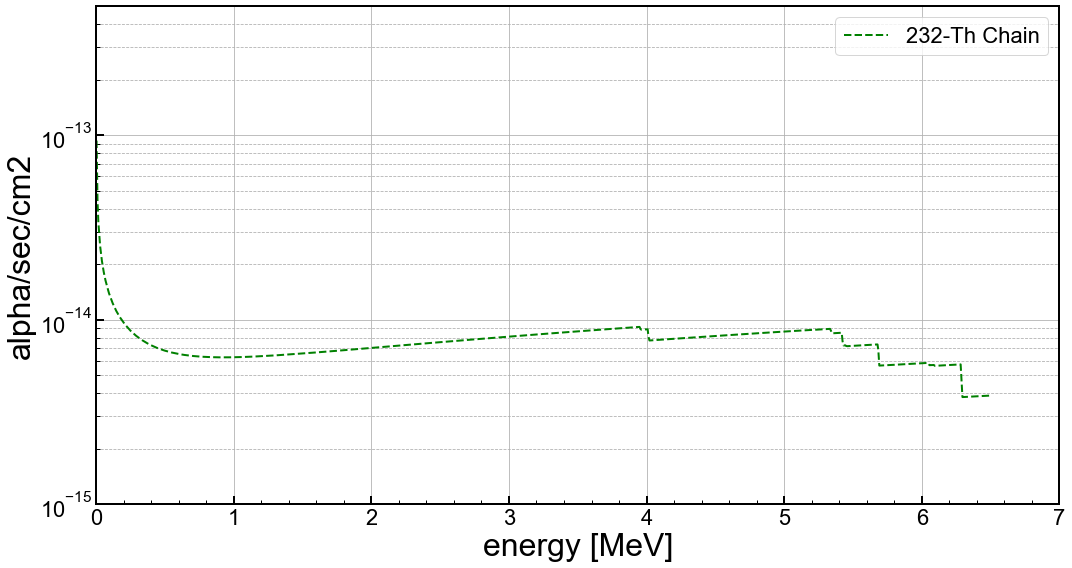

In [11]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

#Eplot=np.linspace(0,5000,1000)
#print(Th232Ea)

ax1.plot(Th232Ea, Th232Ra,color='g',linestyle='--',label="232-Th Chain")
#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-15
ymax = 5e-13


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 7) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('alpha/sec/cm2')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [12]:
#make lists of isotopes and half-lives

u235n =10
u235ppm = 9e-15*0.007204 #natural ratio to U-238
U235thalf = np.zeros((u235n,))
U235thalf[0]= 7.04e8*365*24*60*60 #seconds
U235thalf[1]= 3.276e4*365*24*60*60
U235thalf[2]= 21.772*365*24*60*60*0.9862 #branching
U235thalf[3]= 18.697*24*60*60 #this is behind the 0.0138 branch
U235thalf[4]= 11.43*24*60*60 
U235thalf[5]= 3.96
U235thalf[6]= 1.781e-3
U235thalf[7]= 2.14*60*0.9972 #branching
U235thalf[8]= 22.0*60*6e-3 #branching
U235thalf[9]= 56.0*0.936 #branching

print(U235thalf)
U235tmean = U235thalf/np.log(2)
u235R = (1/U235tmean[0])*u235ppm
print(U235tmean)
U235N = u235R*U235tmean
print(U235N)
U235chain = np.asarray(U235thalf,dtype=np.dtype('U25'))
U235chain[0] = '922350'
U235chain[1] = '912310'
U235chain[2] = '892270'
U235chain[3] = '902270'
U235chain[4] = '882230'
U235chain[5] = '862190'
U235chain[6] = '842150'
U235chain[7] = '832110'
U235chain[8] = '872230'
U235chain[9] = '852190'


print(U235chain)
U235decay = np.asarray(U235thalf,dtype=np.dtype('U25'))
U235decay[0] = 'alpha'
U235decay[1] = 'alpha'
U235decay[2] = 'alpha'
U235decay[3] = 'alpha'
U235decay[4] = 'alpha'
U235decay[5] = 'alpha'
U235decay[6] = 'alpha'
U235decay[7] = 'alpha'
U235decay[8] = 'alpha'
U235decay[9] = 'alpha'


print(U235decay)

#do some sorting
p5 = U235chain.argsort()
print(p5)
U235chain = U235chain[p5]
U235decay = U235decay[p5]
U235N = U235N[p5]
U235tmean = U235tmean[p5]
U235thalf = U235thalf[p5]

[2.22013440e+16 1.03311936e+12 6.77126687e+08 1.61542080e+06
 9.87552000e+05 3.96000000e+00 1.78100000e-03 1.28040480e+02
 7.92000000e+00 5.24160000e+01]
[3.20297689e+16 1.49047618e+12 9.76887314e+08 2.33055958e+06
 1.42473637e+06 5.71307236e+00 2.56943987e-03 1.84723366e+02
 1.14261447e+01 7.56203033e+01]
[6.48360000e-17 3.01708432e-21 1.97745622e-24 4.71761633e-27
 2.88401105e-27 1.15646404e-32 5.20116782e-36 3.73924775e-31
 2.31292808e-32 1.53073786e-31]
['922350' '912310' '892270' '902270' '882230' '862190' '842150' '832110'
 '872230' '852190']
['alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha' 'alpha'
 'alpha']
[7 6 9 5 8 4 2 3 1 0]


In [13]:
for i,el in enumerate(U235chain):
    if(U235decay[i]=='alpha'):
      print('{} {}'.format(el,U235N[i]))

832110 3.739247750622665e-31
842150 5.201167821191366e-36
852190 1.5307378580323787e-31
862190 1.1564640410958904e-32
872230 2.3129280821917808e-32
882230 2.8840110523038605e-27
892270 1.9774562249863636e-24
902270 4.717616329389788e-27
912310 3.017084318181818e-21
922350 6.4836e-17


In [14]:
u235sourcesFL = pd.read_csv("copper-inputs/interface/U235-chain-copper-tape6.txt", skiprows=28, nrows=1, engine='python', names=['target','ta','tanum','alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], \
                         delim_whitespace=True)
print (u235sourcesFL.head(10))

u235sources = pd.read_csv("copper-inputs/interface/U235-chain-copper-tape6.txt", skiprows=29, skipfooter=3, engine='python', names=['alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], \
                         delim_whitespace=True)
print (u235sources.head(10))

  target  ta  tanum  alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  \
0     be   9    1.0          0.004     5.019700e-15              0.0   

   neut/sec/cm^2  
0            0.0  
   alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  neut/sec/cm^2
0          0.011     2.366700e-15              0.0            0.0
1          0.017     1.816500e-15              0.0            0.0
2          0.024     1.530800e-15              0.0            0.0
3          0.030     1.347500e-15              0.0            0.0
4          0.037     1.217000e-15              0.0            0.0
5          0.043     1.118000e-15              0.0            0.0
6          0.050     1.039600e-15              0.0            0.0
7          0.056     9.756400e-16              0.0            0.0
8          0.063     9.221300e-16              0.0            0.0
9          0.069     8.765600e-16              0.0            0.0


In [15]:
U235Eafirst = np.asarray(u235sourcesFL['alpha E [MeV]'],dtype=float)
U235Rafirst = np.asarray(u235sourcesFL['alphas/sec/cm^2'],dtype=float)

U235Ea = np.asarray(u235sources['alpha E [MeV]'],dtype=float)
U235Ra = np.asarray(u235sources['alphas/sec/cm^2'],dtype=float)

print(np.shape(U235Eafirst))
print(np.shape(U235Ea))

U235Ea = np.concatenate((U235Eafirst,U235Ea))
U235Ra = np.concatenate((U235Rafirst,U235Ra))
print(np.shape(U235Ea))

(1,)
(999,)
(1000,)


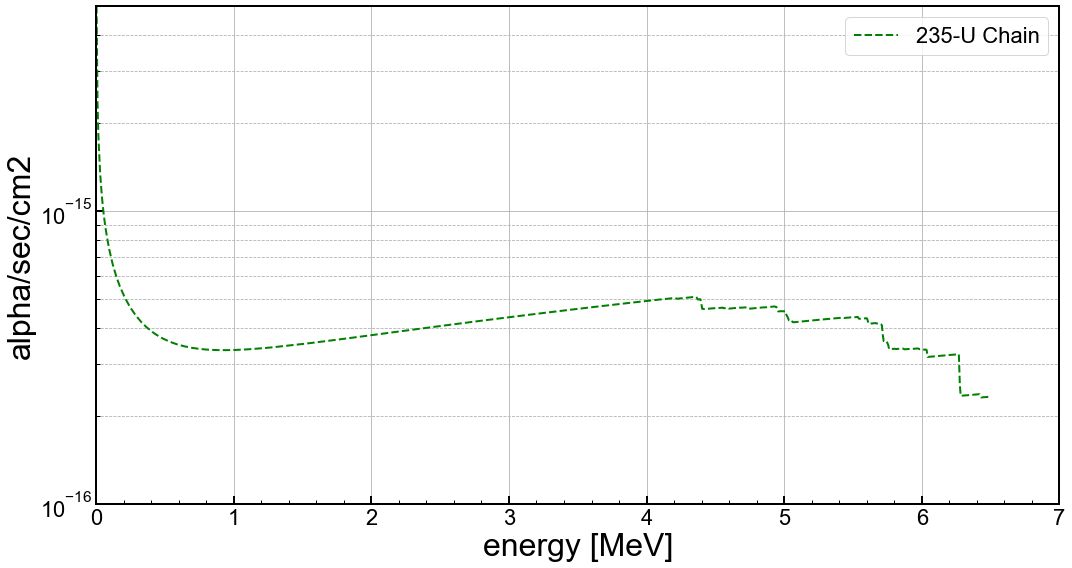

In [16]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

#Eplot=np.linspace(0,5000,1000)
#print(U235Ea)

ax1.plot(U235Ea, U235Ra,color='g',linestyle='--',label="235-U Chain")
#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-16
ymax = 5e-15


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 7) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('alpha/sec/cm2')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

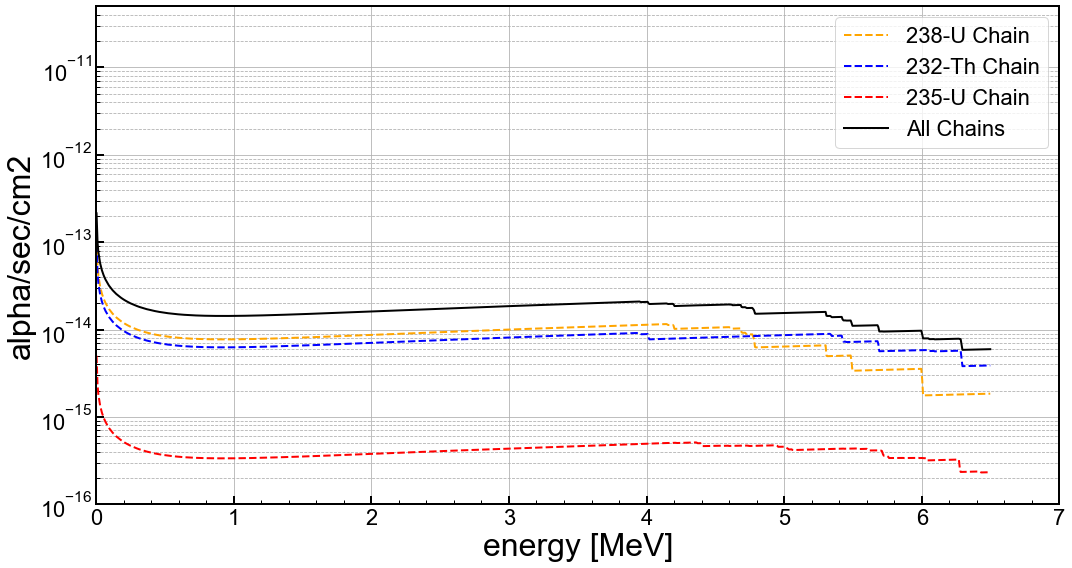

In [17]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes



ax1.plot(U238Ea, U238Ra,color='orange',linestyle='--',label="238-U Chain")
ax1.plot(Th232Ea, Th232Ra,color='blue',linestyle='--',label="232-Th Chain")
ax1.plot(U235Ea, U235Ra,color='red',linestyle='--',label="235-U Chain")
ax1.plot(U235Ea, U235Ra+U238Ra+Th232Ra,color='k',linestyle='-',label="All Chains")
#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-16
ymax = 5e-11


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 7) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('alpha/sec/cm2')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [18]:
th232OnlysourcesFL = pd.read_csv("copper-inputs/interface/Th232-only-copper-tape6.txt", skiprows=26, nrows=1, engine='python', \
                names=['target','ta','tanum','alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'],delim_whitespace=True)
print (th232OnlysourcesFL.head(10))

th232Onlysources = pd.read_csv("copper-inputs/interface/Th232-only-copper-tape6.txt", skiprows=27, skipfooter=3, engine='python', \
                names=['alpha E [MeV]','alphas/sec/cm^2','p(e) neut/alpha','neut/sec/cm^2'], delim_whitespace=True)
print (th232Onlysources.head(10))

   target            ta  tanum  alpha E [MeV]  alphas/sec/cm^2  \
0   0.037  3.710300e-15    0.0            0.0              NaN   

   p(e) neut/alpha  neut/sec/cm^2  
0              NaN            NaN  
   alpha E [MeV]  alphas/sec/cm^2  p(e) neut/alpha  neut/sec/cm^2
0          0.043     3.408500e-15              0.0            0.0
1          0.050     3.169600e-15              0.0            0.0
2          0.056     2.974500e-15              0.0            0.0
3          0.063     2.811400e-15              0.0            0.0
4          0.069     2.672500e-15              0.0            0.0
5          0.076     2.552300e-15              0.0            0.0
6          0.082     2.447200e-15              0.0            0.0
7          0.089     2.354300e-15              0.0            0.0
8          0.095     2.271400e-15              0.0            0.0
9          0.102     2.196900e-15              0.0            0.0


In [19]:
Th232OnlyEafirst = np.asarray(th232OnlysourcesFL['alpha E [MeV]'],dtype=float)
Th232OnlyRafirst = np.asarray(th232OnlysourcesFL['alphas/sec/cm^2'],dtype=float)

Th232OnlyEa = np.asarray(th232Onlysources['alpha E [MeV]'],dtype=float)
Th232OnlyRa = np.asarray(th232Onlysources['alphas/sec/cm^2'],dtype=float)

print(np.shape(Th232OnlyEafirst))
print(np.shape(Th232OnlyEa))

Th232OnlyEa = np.concatenate((Th232OnlyEafirst,Th232OnlyEa))
Th232OnlyRa = np.concatenate((Th232OnlyRafirst,Th232OnlyRa))
print(np.shape(Th232OnlyEa))

(1,)
(612,)
(613,)


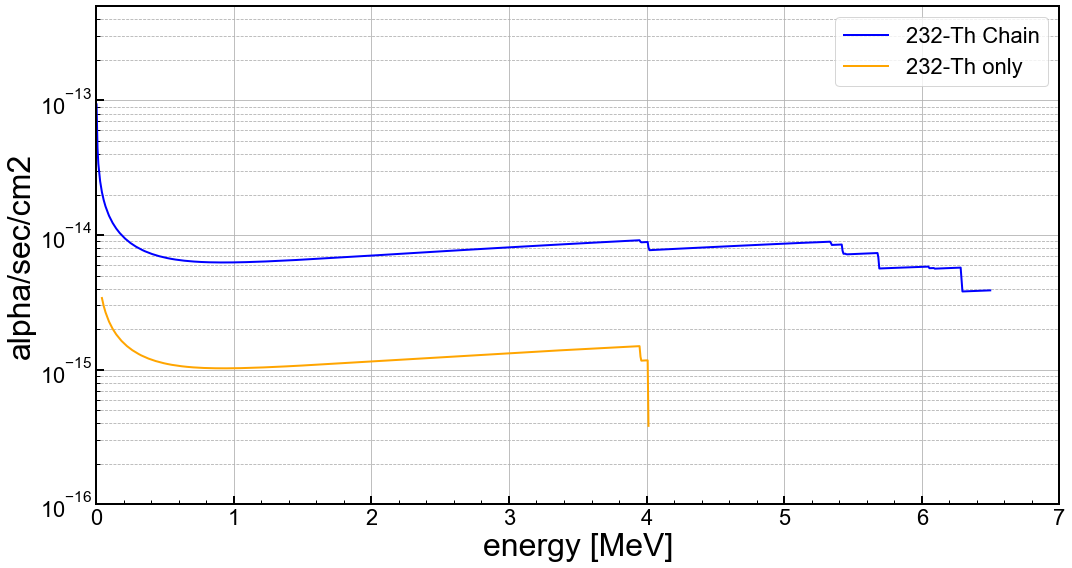

In [20]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes



ax1.plot(Th232Ea, Th232Ra,color='blue',linestyle='-',label="232-Th Chain")
ax1.plot(Th232OnlyEa, Th232OnlyRa,color='orange',linestyle='-',label="232-Th only")


#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-16
ymax = 5e-13


#ax1.set_yscale('linear')
ax1.set_yscale('log')
ax1.set_xlim(0.0, 7) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [MeV]')
ax1.set_ylabel('alpha/sec/cm2')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [22]:
#get some cross section data
import ENDF6
f = open('../data/jendl5_3He.endf6')
lines = f.readlines()
sec = ENDF6.find_section(lines, MF=3, MT=2)  # Elastic
x, y = ENDF6.read_table(sec)

sec_np = ENDF6.find_section(lines, MF=3, MT=103)  # Elastic
xnp, ynp = ENDF6.read_table(sec_np)

NameError: name 'he_res' is not defined

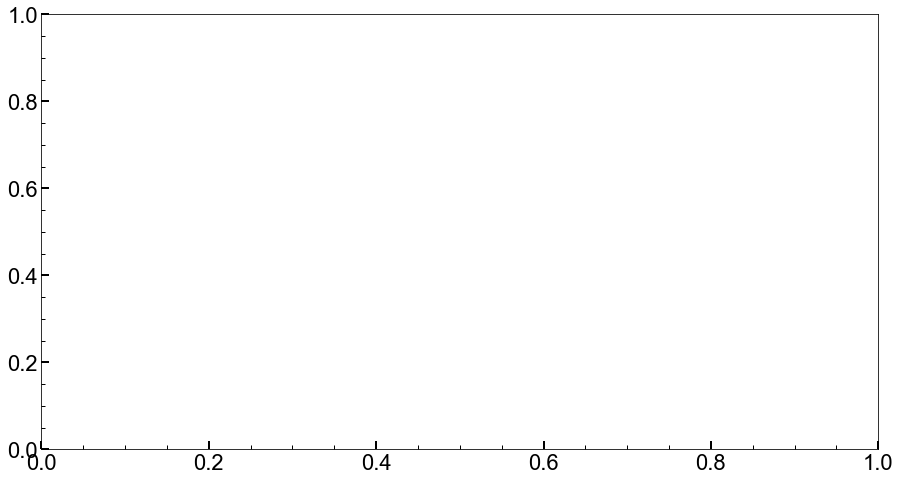

In [23]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(15.0,8.0),sharex=True)
ax1 = axes

Eplot=np.linspace(0,5000,1000)

ax1.plot(Eplot, 100*he_res(Eplot),color='g',linestyle='--',label="$\sigma$ He (%)")
ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 1e-1
ymax = 60


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 5*1000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'energy [keV]')
ax1.set_ylabel('resolution (%)')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [ ]:
#for all that have penetrated, how much proton path they loose. 
dgen_nplow = np.random.exponential(Sigmanp(Enlow))
thetgen_nplow = np.random.uniform(0,np.pi,np.shape(Enlow))
print(np.shape(Enlow))
print(np.shape(dgen_nplow))
print(np.shape(thetgen_nplow))
print(dgen_nplow[0:10])
print(thetgen_nplow[0:10])

In [ ]:
lw_nplow = dgen_nplow/np.cos(thetgen_nplow)

In [ ]:
cNoChange_nplow = (thetgen_nplow>=np.pi/2) | (~cEscape_nplow) | (protRange_nplow<=lw_nplow)
print(np.shape(Enlow[cNoChange_nplow]))

In [ ]:
print(np.shape(Enlow[cEscape_nplow]))
print(np.shape(Enlow))

In [ ]:
perc_nplow = lw_nplow/protRange_nplow

In [ ]:
En_mod_low = Enlow+Q
En_mod_low[~cNoChange_nplow] = (En_mod_low[~cNoChange_nplow])*perc_nplow[~cNoChange_nplow]

In [ ]:
Enlow_res = (En_mod_low) + np.random.normal(0,(En_mod_low)*np.abs(er_res((En_mod_low)*1000)),np.shape(En_mod_low))
Enel1x_res = Enel1x + np.random.normal(0,Enel1x*(he_res(Enel1x*1000)),np.shape(Enel1x))


ebins = np.linspace(0,5,100)
xcq = (ebins[:-1] + ebins[1:]) / 2
ndata,nxdata = np.histogram(Enlow_res,bins=ebins)

neldata,nxeldata = np.histogram(Enel1x_res,bins=ebins)

sigdata = np.sqrt(ndata+neldata)
sigeldata = np.sqrt(neldata)

In [ ]:
#apply FC error bars
fcup = [1.29,2.75,4.25,5.30,6.78,7.81,9.28,10.30,11.32,12.79,13.81,14.82,16.29,17.30,18.32,19.32,20.80,21.81,22.82,23.82,25.30]
fcdn = [0.00,0.37,0.74,1.10,2.34,2.75,3.82,4.25,5.30,6.33,6.78,7.81,8.83,9.28,10.30,11.32,12.33,12.79,13.81,14.82,15.83]

print(np.shape(fcup))
print(np.shape(fcdn))